<a href="https://colab.research.google.com/github/meierkilian/iapr2020_gkj/blob/master/labs/lab_02_object_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from classify_lib import *

# Extract Fourier Descriptor : 
### GOAL : separate the +,- and * symbols
### Details : 
- We only used the module (and NOT the phase) to have rotationaly invariant features
- We did NOT used the first Fourier Descriptor to make the features Translationaly invariant
- We devided all the features by the first one : to make it scaled invariant (QUESTION : should I divide the descriptors, so the complex numbers by the real value of the fisrt descriptor ? OR should I didvide the descriptors by the module of the first descriptor ?)

In [2]:
im = imageio.imread('../../data/original_operators.png')
print(im.shape)
#plt.imshow(im[:,:,0:3])
greyim = rgb2gray(rgba2rgb(im))   # or : greyim = rgb2gray(im[:,:,0:3])
print(greyim.shape)
#plt.imshow(greyim)
width = greyim.shape[1]//5


symbols = [ None for i in np.arange(5)]
markers = [ np.zeros( (greyim.shape[0], width)) for i in np.arange(5) ]    # convert to binary (either 0 or 255) picture


for i in np.arange(5):  #convert to [0, 255] integer value picture =======
    symbols[i] = np.round(255*greyim[:,width*i:width*(i+1)],0)
    symbols[i] = symbols[i].astype(int) #convert to int

    thresh = 0.9*255    #!!! np.average(im_gray)
    interval = 0.1*255  #!!! to adjust probably !!!
    markers[i][symbols[i]<thresh-interval] = 255
    markers[i][symbols[i]>thresh+interval] = 255
    markers[i] = markers[i].astype(int)
    symbols[i] = np.copy(markers[i]) #convert into int
    symbols[i] = symbols[i].astype(np.uint8) #convert the picture to CV_8UC1 type

print("min = ", np.amin(symbols[0]), "max 0 ", np.amax(symbols[0]))
print("shape = ", symbols[0].shape)

(316, 1736, 4)
(316, 1736)
min =  0 max 0  255
shape =  (316, 347)


In [3]:
descriptors = [None for i in np.arange(5)]
for i in np.arange(5):
    descriptors[i], _, _= extract_fourier_descriptor(symbols[i], methode = 'CV2')

In [4]:
modules = list(descriptors) #copy shape only
for i in np.arange(5):
    modules[i] = np.absolute(descriptors[i])
    modules[i] = modules[i]/modules[0][0] #scaling : divide by the first value

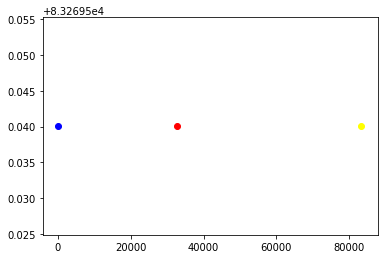

In [21]:
ONE_OBJECT_SIGNS = (PLUS, MINUS, TIMES) = 0,2,4
feat0, feat1 = 1,1 

plt.scatter(modules[PLUS][feat0], modules[i][feat1], color='blue') #the +
plt.scatter(modules[MINUS][feat0], modules[i][feat1], color='red') #the +
plt.scatter(modules[TIMES][feat0], modules[i][feat1], color='yellow') #the +

In [19]:
feat0 = 1        #Note the feature 1 is the best
print("+ = {}\n- = {}\n* = {}\n".format(
    np.round(modules[PLUS][feat0],0), 
    np.round(modules[MINUS][feat0],0),
    np.round(modules[TIMES][feat0],0) ) )

+ = 0.0
- = 32823.0
* = 83270.0



In [1]:
def extract_fourier_descriptor(im, methode = "AC"):
    """
    Computes fourier descriptors given a greysclale picture.

    INPUT :
      im : grayscale image to search to contour in
      methode : specifies methode to be used to search contour, see getContour()
                for details
    OUPUT :
      fd : Fourier descriptor coefficients
      snake : order point list of the contour 
      im : filtered image used for contour search
    """
    
    im, snake = get_contour(im, methode)
    
    z = (snake[:,0] + 1j*snake[:,1]) #put the 2D points of the snake in a complex representation
    big_z = np.zeros(  (z.shape[0] + 30)  )
    fd = np.fft.fft(big_z)

    return fd, snake, im 

In [2]:
def compute_feat_with_fourier_descriptor( pic, feat_n = 1 ):
    """
    Take a CV_8UC1 picture in input and return the n th feature of its Fourier Descriptor which is :
    - Translation invariant (as soon as feat_n is NOT 0)
    - Rotation invariant
    - Sclaled invariant
    """
    descriptor, snake, im= extract_fourier_descriptor(pic, methode = 'CV2')
    module = np.absolute(descriptor) #compute module : rotation invariant
    module/=module[0] #make it sclale invariant
    return module[feat_n],snake, im

In [10]:

plus, snake_plus, im_plus = compute_feat_with_fourier_descriptor(symbols[PLUS], 1)

In [23]:
ONE_OBJECT_SIGNS[1]

2

(772, 2)
(496, 2)
(901, 2)


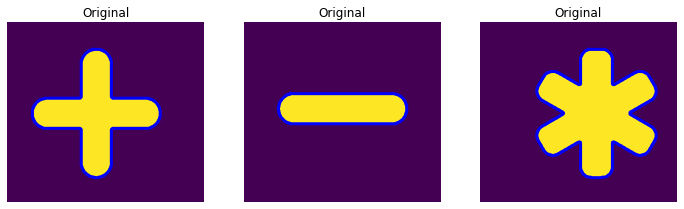

In [31]:
# display results : the contours are perfect ! 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), sharex=True, sharey=True)
ax = axes.ravel()

for i in np.arange(len(ONE_OBJECT_SIGNS)):
    descr, snake, im =  compute_feat_with_fourier_descriptor(symbols[ONE_OBJECT_SIGNS[i]], 1)
    ax[i].plot(snake[:,1], snake[:,0], '-b', lw=3)
    ax[i].imshow(im)
    ax[i].set_title("Original")
    print(snake.shape)

for a in ax:
    a.axis('off')
    


In [30]:
snake.shape

(901, 2)